C:\Anaconda3\lib\site-packages\torchvision\transforms\transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


X_example个数16
y_example个数16
{'cat': 0, 'dog': 1}
['cat', 'dog']
['cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog']


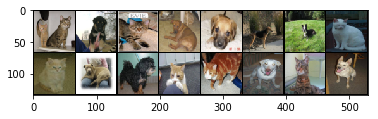

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Date    : 2018-09-20 11:39:53
# @Author  : Guosheng Kang (guoshengkang@gmail.com)

import os
import time
import  torch
import torchvision
from torchvision import datasets,transforms
from torch.autograd import Variable
import matplotlib.pylab as plt
%matplotlib inline

data_dir="DogsVSCats"
data_transform={
	x:transforms.Compose([transforms.Scale([64,64]),transforms.ToTensor()])
	for x in ["train","valid"] }

image_datasets={
	x:datasets.ImageFolder(root=os.path.join(data_dir,x),transform=data_transform[x])
	for x in ["train","valid"] }

dataloader={
	x:torch.utils.data.DataLoader(dataset=image_datasets[x],batch_size=16,shuffle=True)
	for x in ["train","valid"] }

X_example,y_example=next(iter(dataloader["train"]))
print(u"X_example个数{}".format(len(X_example)))
print(u"y_example个数{}".format(len(y_example)))

index_classes=image_datasets["train"].class_to_idx
print(index_classes)
example_classes=image_datasets["train"].classes
print(example_classes)

img=torchvision.utils.make_grid(X_example)
img=img.numpy().transpose([1,2,0])
print([example_classes[i] for i in y_example])
plt.imshow(img)
plt.show()